ALUNOS

- **Gabriela Cruz Targino**
- **Keven Alison dos Santos Bezerra**

## 0. Configurações de ambiente

Inicialmente vamos adicionar os pacotes e bibliotecas necessárias para a execução do projeto, permitindo a utilização de ferramentas de manipulação e exibição dos grafos.

In [ ]:
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [ ]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

In [ ]:
!pip install geocoder==1.38.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


As linhas de código a seguir tratam da manipulação dos dados que serão utilizados na analise gráfica, após serem transformados em grafos. Os dados são extraídos de uma fonte pública e manipulados para facilitar a compreensão dos elementos.
É importante salientar que os dados utilizados nesse trabalho tem como fonte o repositório do desenvolvedor Álvaro "https://github.com/alvarofpp/dataset-flights-brazil/blob/main/transform_to_anac_csv.py", com pequenas mudanças em caminhos de arquivo e com a adição de uma coluna "Region" no arquivo "transform_to_graphml.py".

In [ ]:
!python extract.py

100% 23/23 [00:00<00:00, 112697.42it/s]


In [ ]:
!python transform_to_anac_csv.py

transform_to_anac_csv.py:7: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.
  combined_csv = pd.concat([pd.read_csv(file, sep=';', encoding='ISO-8859-1') for file in files])


In [ ]:
!python transform_to_airports_csv.py

In [ ]:
!python transform_to_graphml.py

sys:1: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.


Ao fim da manipulação dos dados, temos um arquivo ".graphml" pronto para ser lido e manipulado pelas bibliotecas.

In [ ]:
G = nx.read_graphml('/content/air_traffic.graphml')

In [91]:
print("Numero de Nós: ", G.number_of_nodes())
print("Número de Links: ", G.number_of_edges())

Numero de Nós:  1116
Número de Links:  9975


In [93]:
print("Todos os nós presentes no grafo.\n")
G.nodes(data=True)

Todos os nós presentes no grafo.



NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 32.896801, 'longitude': -97.038002}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 40.639801, 'longitude': -73.7789}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 25.79319953918457, 'longitude': -80.29060363769531}, 'SBCF': {'name': 'CONFINS', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -19.62444305419922, 'longitude': -43.97194290161133}, 'SBGL': {'name': 'RIO DE JANEIRO', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -22.8099994659, 'longitude': -43.2505569458}, 'SBGR': {'name': 'GUARULHOS', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -23.435556411743164, 'longitude': -46.47305679321289}, 'SGAS': {'name': 'ASUNCIÓN', 'region': nan, 'country': 'PARAGUAI', 'latitude': -25.239999771118164, 'longitude': -57.520000457763

O grafo extraído contém as informações da malha aerea do mundo todo, porém, para este trabalho, nos interessa apenas analisar a malha aérea do Brasil. Dessa forma, filtramos as informações com apenas algumas linhas de código.

In [ ]:
brasil_nodes_list = []
for node in G.nodes():
  if G.nodes[node]['country'] == "BRASIL":
    brasil_nodes_list.append(node)

In [ ]:
G_brasil = G.subgraph(brasil_nodes_list)

In [94]:
print("Informações gerais acerca da malha aérea brasileira")
print("Numero de nós: ", G_brasil.number_of_nodes())
print("Numero de links: ", G_brasil.number_of_edges())


Informações gerais acerca da malha aérea brasileira
Numero de nós:  505
Numero de links:  4512


In [ ]:
G_brasil.nodes(data=True)

NodeDataView({'SILJ': {'name': 'LARANJAL DO JARI', 'region': 'NORTE', 'country': 'BRASIL', 'latitude': -0.831374, 'longitude': -52.504075}, 'SDZG': {'name': 'TAUÁ', 'region': 'NORDESTE', 'country': 'BRASIL', 'latitude': -5.9334, 'longitude': -40.2975}, 'SNBU': {'name': 'BRUMADO', 'region': 'NORDESTE', 'country': 'BRASIL', 'latitude': -14.2554, 'longitude': -41.817501}, 'SWLV': {'name': 'SANTO ANTÔNIO DO LEVERGER', 'region': 'CENTRO-OESTE', 'country': 'BRASIL', 'latitude': -15.853400230407717, 'longitude': -56.087398529052734}, 'SBJH': {'name': 'SÃO ROQUE', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -23.426886, 'longitude': -47.165658}, 'SNOX': {'name': 'ORIXIMINÁ', 'region': 'NORTE', 'country': 'BRASIL', 'latitude': -1.714079976081848, 'longitude': -55.83620071411133}, 'SSVI': {'name': 'VIDEIRA', 'region': 'SUL', 'country': 'BRASIL', 'latitude': -26.99970054626465, 'longitude': -51.14189910888672}, 'SNFX': {'name': 'SÃO FÉLIX DO XINGU', 'region': 'NORTE', 'country': 'BRASIL'

Como forma de facilitar as análises, também filtramos a malha aérea nacional por região, criando subgrafos para cada uma delas.

In [ ]:
norte_nodes_list = []
for node in G.nodes():
  if G.nodes[node]['region'] == "NORTE":
    norte_nodes_list.append(node)
    G_norte = G.subgraph(norte_nodes_list)

nordeste_nodes_list = []
for node in G.nodes():
  if G.nodes[node]['region'] == "NORDESTE":
    nordeste_nodes_list.append(node)
    G_nordeste = G.subgraph(nordeste_nodes_list)

sul_nodes_list = []
for node in G.nodes():
  if G.nodes[node]['region'] == "SUL":
    sul_nodes_list.append(node)
    G_sul = G.subgraph(sul_nodes_list)

sudeste_nodes_list = []
for node in G.nodes():
  if G.nodes[node]['region'] == "SUDESTE":
    sudeste_nodes_list.append(node)
    G_sudeste = G.subgraph(sudeste_nodes_list)

centrooeste_nodes_list = []
for node in G.nodes():
  if G.nodes[node]['region'] == "CENTRO-OESTE":
    centrooeste_nodes_list.append(node)
    G_centrooeste = G.subgraph(centrooeste_nodes_list)

In [95]:
print("Informações gerais acerca da malha aérea do Norte")
print("Numero de nós: ", G_norte.number_of_nodes())
print("Numero de links: ", G_norte.number_of_edges())
print("")

print("Informações gerais acerca da malha aérea do Nordeste")
print("Numero de nós: ", G_nordeste.number_of_nodes())
print("Numero de links: ", G_nordeste.number_of_edges())
print("")

print("Informações gerais acerca da malha aérea do Sul")
print("Numero de nós: ", G_sul.number_of_nodes())
print("Numero de links: ", G_sul.number_of_edges())
print("")

print("Informações gerais acerca da malha aérea do Sudeste")
print("Numero de nós: ", G_sudeste.number_of_nodes())
print("Numero de links: ", G_sudeste.number_of_edges())
print("")

print("Informações gerais acerca da malha aérea do Centrooeste")
print("Numero de nós: ", G_centrooeste.number_of_nodes())
print("Numero de links: ", G_centrooeste.number_of_edges())
print("")

Informações gerais acerca da malha aérea do Norte
Numero de nós:  128
Numero de links:  600

Informações gerais acerca da malha aérea do Nordeste
Numero de nós:  93
Numero de links:  362

Informações gerais acerca da malha aérea do Sul
Numero de nós:  74
Numero de links:  332

Informações gerais acerca da malha aérea do Sudeste
Numero de nós:  119
Numero de links:  778

Informações gerais acerca da malha aérea do Centrooeste
Numero de nós:  91
Numero de links:  242



## 1. Análise da assortatividade da rede

A assortatividade é uma métrica utilizada para quantificar a tendência de nós individuais se conectarem a outros nós semelhantes de um grafo. Podemos classificar um grafo quanto à assortatividade a partir do Coeficiente de Assortatividade **r** [-1, 1]:
- r > 0: **assortativo**, isto é, os nós tendem a se conectar a outros com características semelhantes;
- r ≅ 0: **aleatório**, isto é, os nós tendem a se conectar a outros de maneira aleatória;
- r < 0: **dissortativo**, isto é, os nós tendem a se conectar a outros com características diferentes.

Com base nisso, podemos analisar a assortatividade do grafo sobre vôos considerando como atributo a região brasileira onde está localizada o aeroporto (Norte, Nordeste, Centro-Oeste, Sul e Sudeste). Primeiro, faremos uma análise da rede em relação coeficiente de assortatividade.

In [ ]:
nx.attribute_assortativity_coefficient(G_brasil,"region")

0.3722362197266239

De acordo com o coeficiente obtido, podemos classificar a rede das regiões como **assortativa**, pois é maior que zero. Contudo, o valor é mais próximo de 0 do que de 1, o que nos indica que pode haver uma quantidade considerável de nós que ainda se conectam a outros de maneira aleatória.

Para melhor visualização, podemos gerar um gráfico mostrando as conexões. 

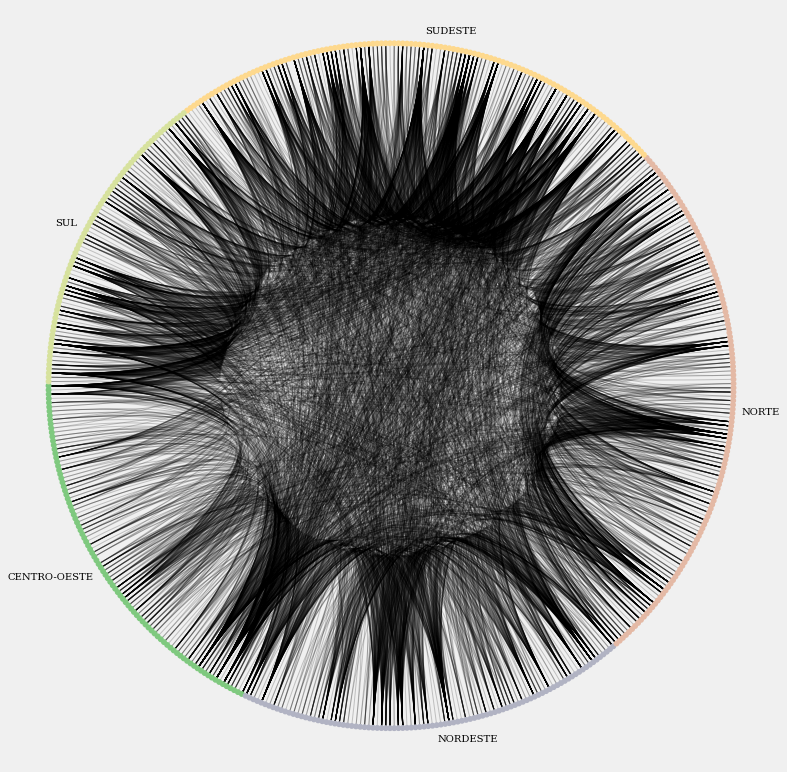

In [124]:
# Create a Circos Plot
c = nv.CircosPlot(G_brasil,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(13, 13))

# Draw c to the screen
c.draw()

# If there is a continuous datatype for the nodes, 
# it will be reflected in self.sm being constructed
# It will then automatically add in a colorbar 
# to the plot and scale the plot axes accordingly
# we need remove the colobar in this case
#c.sm.colorbar.remove()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

In [105]:
# mixing matrix
# dimension of this matrix is proportional to number of groups
# in this case, 5 rows and 5 coluns
print("A assortatividade entre as regiões também pode ser visualizada através da seguinte matriz:\n")
nx.attribute_mixing_matrix(G_brasil,'region')

A assortatividade entre as regiões também pode ser visualizada através da seguinte matriz:



array([[0.13297872, 0.02759309, 0.0206117 , 0.02293883, 0.0070922 ],
       [0.02759309, 0.17242908, 0.05529699, 0.03390957, 0.04000443],
       [0.0206117 , 0.05529699, 0.0802305 , 0.0106383 , 0.01340869],
       [0.02293883, 0.03390957, 0.0106383 , 0.05363475, 0.0120789 ],
       [0.0070922 , 0.04000443, 0.01340869, 0.0120789 , 0.07358156]])

É possível visualizar na imagem acima que os nós de fato tendem a se conectar com outros de maneira semelhante. Porém, também há uma grande quantidade de conexões no meio do gráfico, o que nos indica que também há muitos nós que se conectam aleatoriamente com outros de características diferentes.
Na análise através da matriz também é visivel que o nivel de assortividade na diagonal principal é maior que nos demais elementos da matriz, isso se dá por que na diagonal principal é onde ocorre exatamente a interação entre uma mesma região, provando o ponto acima de que as regiões tendem a possuir mais links com elas mesmas.

## 2. Análise bivariada entre o grau do vértice e o número médio de vizinhos

Seguindo com o conceito de assortatividade, sabemos que em uma rede sortativa os nós terdem a se conectam com seus semelhantes, enquando em uma rede disassortativa, esse padrão não é predominante. Quando relacionamos isso ao graus dos nós, podemos inferir que em uma rede assortativa nós de grau alto tendem a se conectar à graus de nó alto, enquando em uma rede dissortativa eles tenderiam a se conectar a nós de grau menor.

In [ ]:
degree_brasil, avg_neigh_degree_brasil = zip(*nx.average_degree_connectivity(G_brasil).items())
degree_regiao_norte, avg_neigh_degree_norte = zip(*nx.average_degree_connectivity(G_norte).items())
degree_regiao_nordeste, avg_neigh_degree_nordeste = zip(*nx.average_degree_connectivity(G_nordeste).items())
degree_regiao_sul, avg_neigh_degree_sul = zip(*nx.average_degree_connectivity(G_sul).items())
degree_regiao_sudeste, avg_neigh_degree_sudeste = zip(*nx.average_degree_connectivity(G_sudeste).items())
degree_regiao_centrooeste, avg_neigh_degree_centrooeste = zip(*nx.average_degree_connectivity(G_centrooeste).items())

In [ ]:
degree_brasil = list(degree_brasil)
avg_neigh_degree_brasil = list(avg_neigh_degree_brasil)

degree_regiao_norte = list(degree_regiao_norte)
avg_neigh_degree_norte = list(avg_neigh_degree_norte)

degree_regiao_nordeste = list(degree_regiao_nordeste)
avg_neigh_degree_nordeste = list(avg_neigh_degree_nordeste)

degree_regiao_sul = list(degree_regiao_sul)
avg_neigh_degree_sul = list(avg_neigh_degree_sul)

degree_regiao_sudeste = list(degree_regiao_sudeste)
avg_neigh_degree_sudeste = list(avg_neigh_degree_sudeste)

degree_regiao_centrooeste = list(degree_regiao_centrooeste)
avg_neigh_degree_centrooeste = list(avg_neigh_degree_centrooeste)

In [ ]:
degree_assortativity_coefficient_brasil = nx.degree_assortativity_coefficient(G_brasil)
print("Graude assortatividade do Brasil: ", degree_assortativity_coefficient_brasil)

degree_assortativity_coefficient_norte = nx.degree_assortativity_coefficient(G_norte)
print("Graude assortatividade da região norte: ", degree_assortativity_coefficient_norte)

degree_assortativity_coefficient_nordeste = nx.degree_assortativity_coefficient(G_nordeste)
print("Graude assortatividade da região nordeste: ",degree_assortativity_coefficient_nordeste)

degree_assortativity_coefficient_sul = nx.degree_assortativity_coefficient(G_sul)
print("Graude assortatividade da região sul: ",degree_assortativity_coefficient_sul)

degree_assortativity_coefficient_sudeste = nx.degree_assortativity_coefficient(G_sudeste)
print("Graude assortatividade da região sudeste: ",degree_assortativity_coefficient_sudeste)

degree_assortativity_coefficient_centrooeste = nx.degree_assortativity_coefficient(G_centrooeste)
print("Graude assortatividade da região centrooeste: ",degree_assortativity_coefficient_centrooeste)

Graude assortatividade do Brasil:  -0.19522933769365391
Graude assortatividade da região norte:  -0.2201013510739867
Graude assortatividade da região nordeste:  -0.31740910282280993
Graude assortatividade da região sul:  -0.353730950502798
Graude assortatividade da região sudeste:  -0.36429315092441866
Graude assortatividade da região centrooeste:  -0.3459713170990661


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


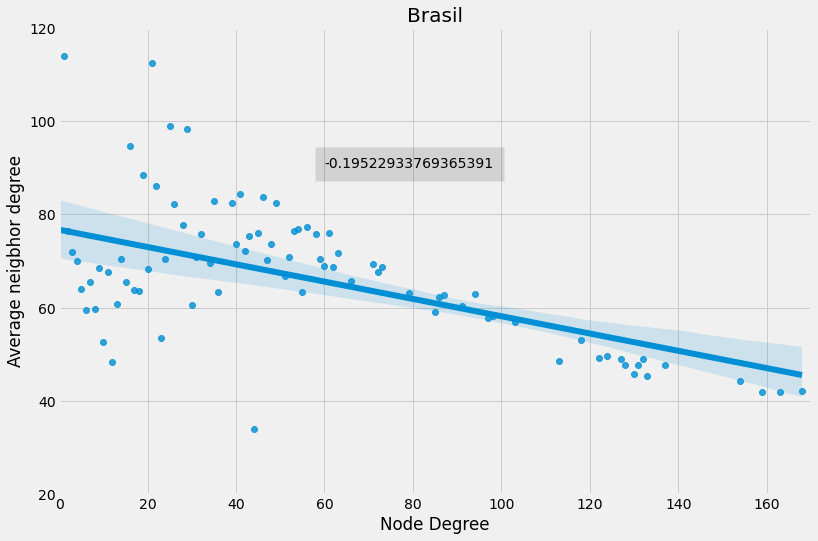

In [118]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_brasil,avg_neigh_degree_brasil,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.text(60, 90, str(degree_assortativity_coefficient_brasil),bbox={'facecolor': '#000', 'alpha': 0.12, 'pad': 10})
ax.set_xlim(0,170)
ax.set_ylim(20,120)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.title("Brasil")

plt.show()

Analisando o gráfico observamos uma linha diagonal decrescente, isto significa que quanto maior o grau do nó menor tende a ser o grau de seus nós vizinhos, indicando que a rede tende à disassortatividade em relação ao grau dos nós. O próprio valor negativo do grau de assortatividade da rede em relação ao grau já nos indicava isso.

Assortatividade da região Norte em relação ao grau


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


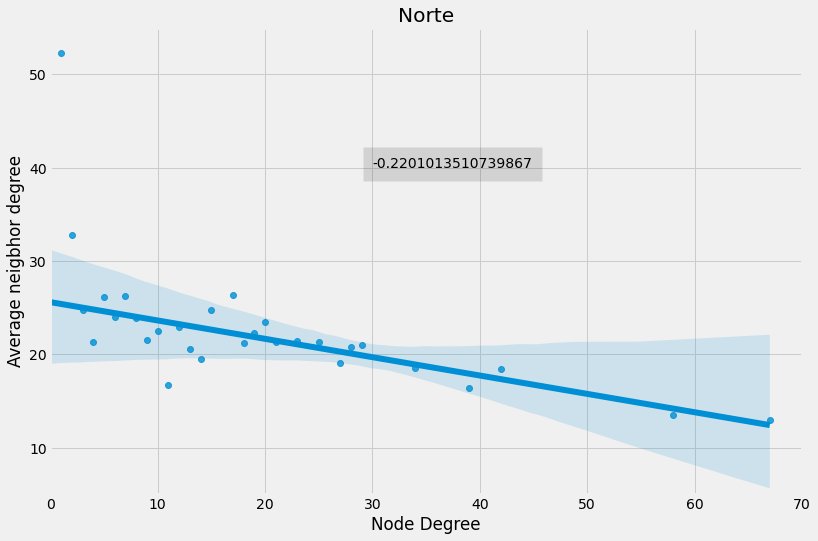

In [119]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_norte,avg_neigh_degree_norte,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.text(30, 40, str(degree_assortativity_coefficient_norte),bbox={'facecolor': '#000', 'alpha': 0.12, 'pad': 10})
ax.set_xlim(0,70)
ax.set_ylim(5,55)

# Save figure
plt.savefig("degree_assortativity_norte.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.title("Norte")

plt.show()

Assortatividade da região Nordeste em relação ao grau

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


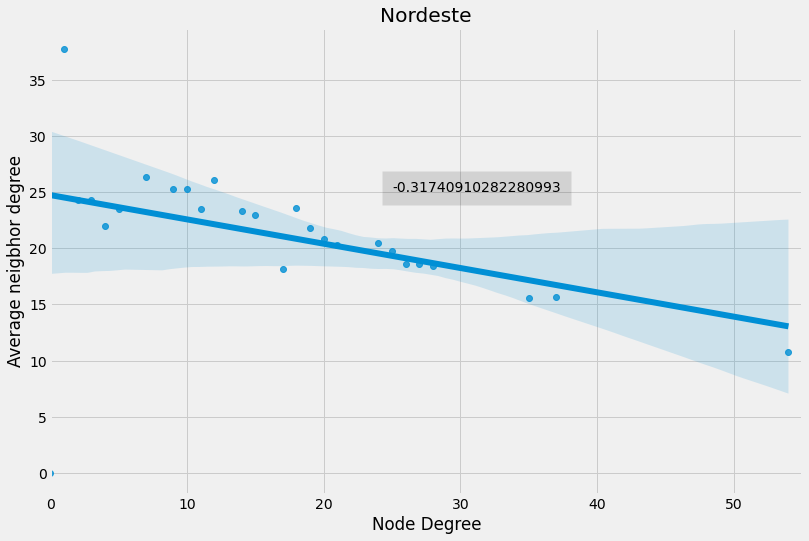

In [120]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_nordeste,avg_neigh_degree_nordeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.text(25, 25, str(degree_assortativity_coefficient_nordeste),bbox={'facecolor': '#000', 'alpha': 0.12, 'pad': 10})
ax.set_xlim(0,55)

# Save figure
plt.savefig("degree_assortativity_nordeste.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.title("Nordeste")

plt.show()

Assortatividade da região Sul em relação ao grau

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


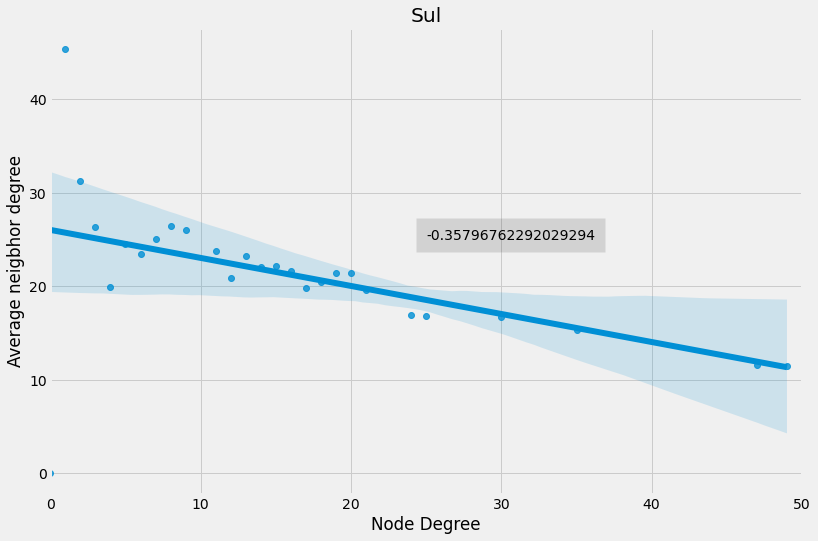

In [121]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_sul,avg_neigh_degree_sul,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.text(25, 25, str(degree_assortativity_coefficient_sul),bbox={'facecolor': '#000', 'alpha': 0.12, 'pad': 10})
ax.set_xlim(0,50)

# Save figure
plt.savefig("degree_assortativity_sul.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.title("Sul")

plt.show()

Assortatividade da região Sudeste em relação ao grau

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


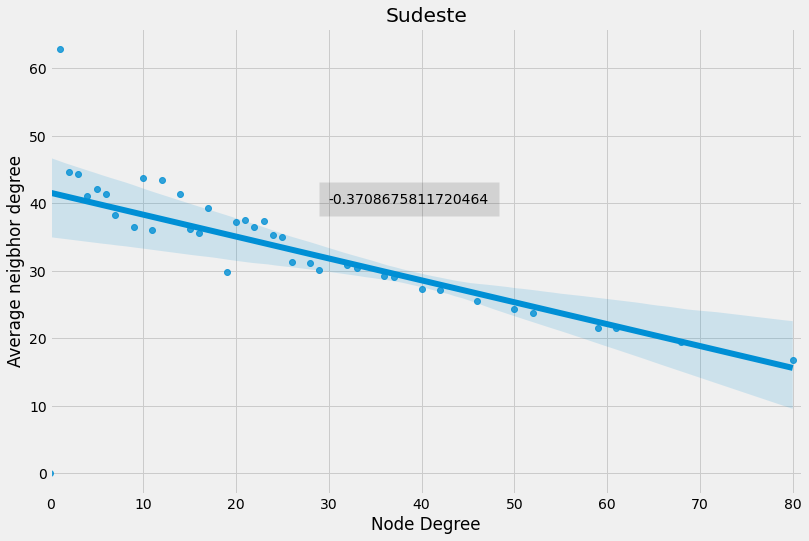

In [122]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_sudeste,avg_neigh_degree_sudeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.text(30, 40, str(degree_assortativity_coefficient_sudeste),bbox={'facecolor': '#000', 'alpha': 0.12, 'pad': 10})
ax.set_xlim(0,81)

# Save figure
plt.savefig("degree_assortativity_sudeste.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.title("Sudeste")

plt.show()

Assortatividade da região Centro-Oeste em relação ao grau


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


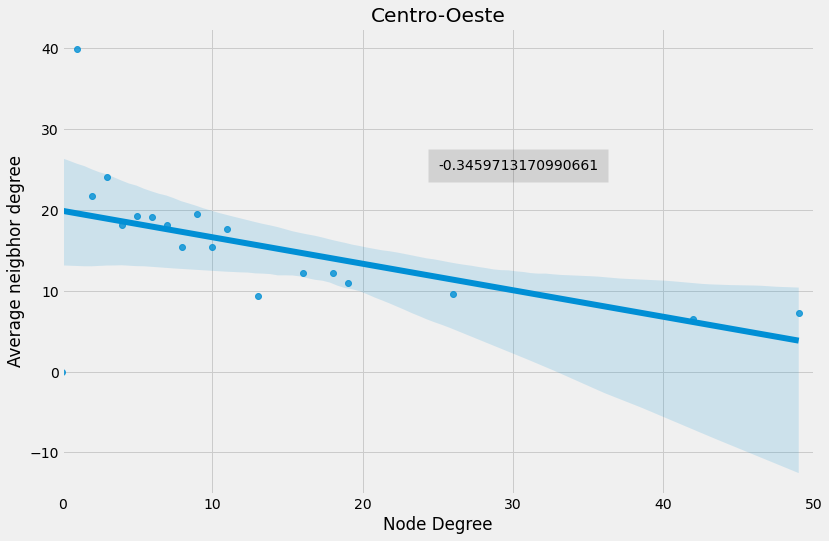

In [123]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_centrooeste,avg_neigh_degree_centrooeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.text(25, 25, str(degree_assortativity_coefficient_centrooeste),bbox={'facecolor': '#000', 'alpha': 0.12, 'pad': 10})
ax.set_xlim(0,50)

# Save figure
plt.savefig("degree_assortativity_centrooeste.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.title("Centro-Oeste")

plt.show()

De maneira geral, percebemos a predominancia da assortatividade em relação ao grau nas regiões Brasileiras. Isso indica que, na malha aérea brasileira, pontos com maior quantidade de links tende a se conectar à pontos com baixa quantidade de links. Trazendo para nossa linguagem, é comum vermos no Brasil um aeroporto com muitas conexões conectado à aeroportos com poucas conexões - nesse caso entende-se por conexões o numero de locais que um aeroporto tem relação de destino/terminal.

## 3. Componentes conectados na malha aérea brasileira

Neste tópico, faremos uma análise sobre os componentes conectados na malha aérea brasileira. Primeiro, será conferido se o grafo que representa a malha aérea é conectado ou não.

In [ ]:
nx.is_connected(G)

False

Podemos observar que o grafo não é conectado. Vamos analisar, então, quantos componentes conectados há na malha aérea brasileira, além de observar essa relação por região. 

In [ ]:
nx.number_connected_components(G_brasil)

6

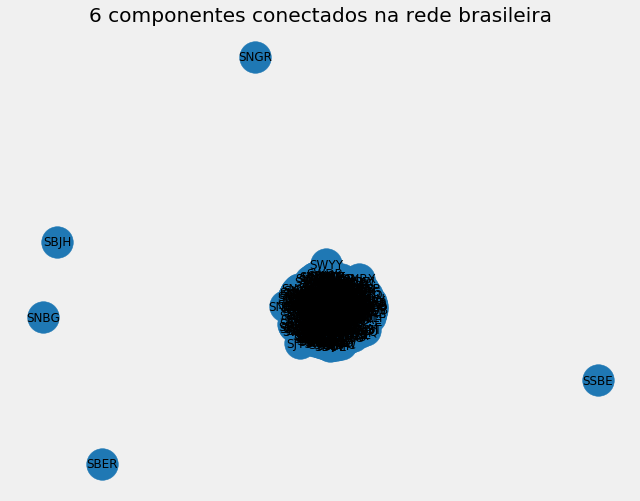

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_brasil, ax=ax,node_size=1000)
plt.axis("off")
plt.title("6 componentes conectados na rede brasileira")
plt.show()

In [ ]:
nx.number_connected_components(G_centrooeste)

7

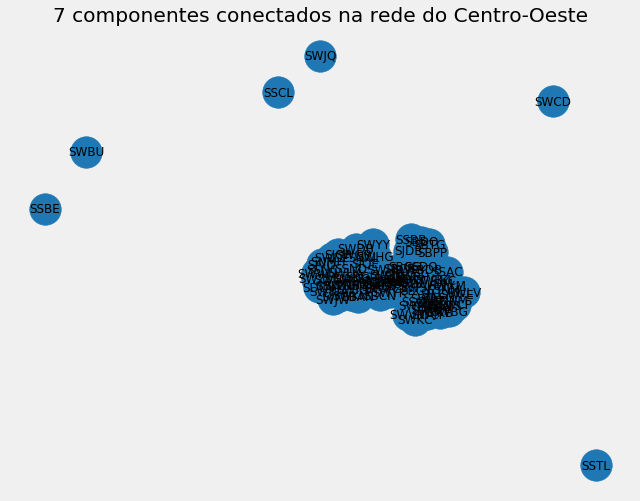

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_centrooeste, ax=ax,node_size=1000)
plt.axis("off")
plt.title("7 componentes conectados na rede do Centro-Oeste")
plt.show()

In [ ]:
nx.number_connected_components(G_nordeste)

5

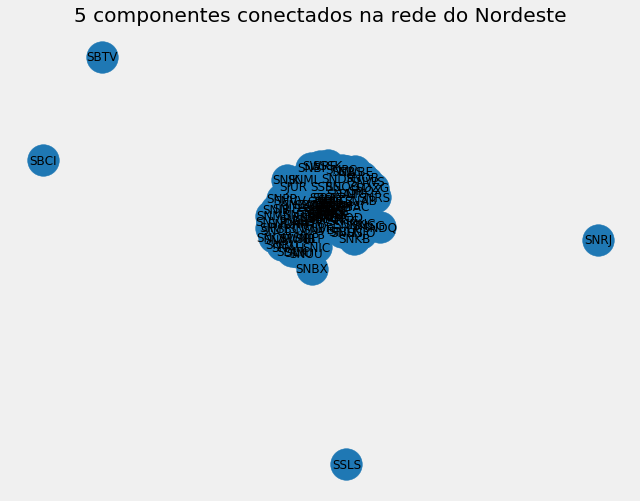

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_nordeste, ax=ax,node_size=1000)
plt.axis("off")
plt.title("5 componentes conectados na rede do Nordeste")
plt.show()

In [ ]:
nx.number_connected_components(G_norte)

5

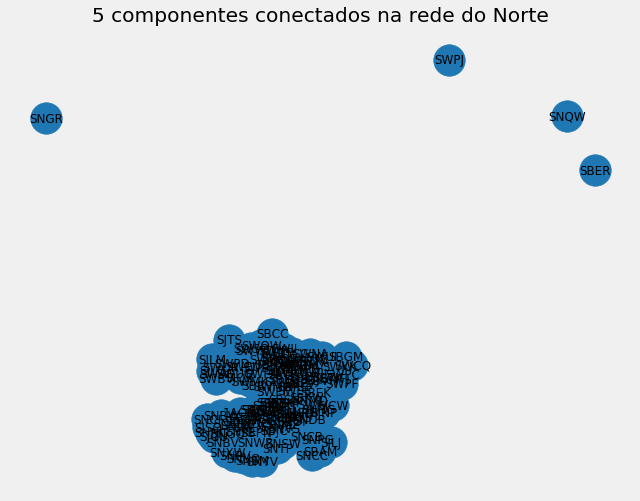

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_norte, ax=ax,node_size=1000)
plt.axis("off")
plt.title("5 componentes conectados na rede do Norte")
plt.show()

In [ ]:
nx.number_connected_components(G_sudeste)

7

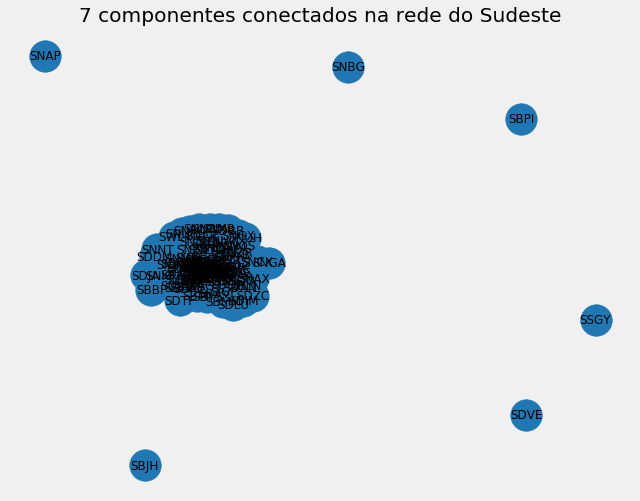

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_sudeste, ax=ax,node_size=1000)
plt.axis("off")
plt.title("7 componentes conectados na rede do Sudeste")
plt.show()

In [ ]:
nx.number_connected_components(G_sul)

6

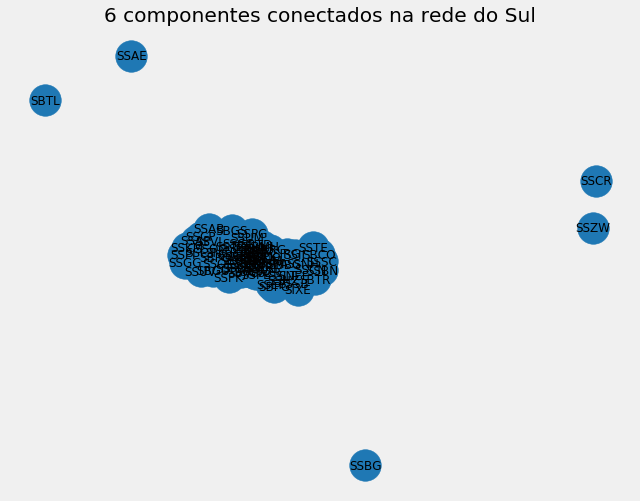

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_sul, ax=ax,node_size=1000)
plt.axis("off")
plt.title("6 componentes conectados na rede do Sul")
plt.show()

## 4. Estudo do Coeficiente de Clustering para a malha aérea brasileira

O coeficiente de clustering compreende, em uma rede, a forma com que certo nó está relacionado com seus nós vizinhos, de forma que podemos estimar a topologia da rede a partir de um nó central "ego". Dependendo de como os nós estão dispostos e da relação entre eles, podemos perceber a formação de triangulos na rede, geralmente indicando forte relação entre os nós daquela rede ao nó central. 

Quando analisamos um triangulo dentro de uma rede aérea, podemos pensar que é possível, por exemplo, um avião sair do nó central(A), ir para outro aeroporto(B), depois para outro(c), e voltar para a origem, como mostra o exemplo a seguir.


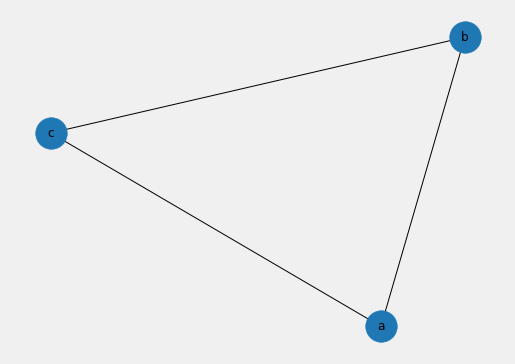

In [152]:
# create a undirected graph
G = nx.Graph()

# create a branch of edges
G.add_edges_from([("a","b"),("a","c"),("b","c")])

# draw the graph
fig, ax = plt.subplots(1, 1,figsize=(8,6))
nx.draw_networkx(G, ax=ax,node_size=1000)
plt.axis("off")
plt.show()

Do contrário, podemos encontrar redes com a topologia de estrela, onde não há relação entre parte dos nós da rede. Podemos assumir por exemplo, um ponto central A ligado aos pontos B, C e D, onde nenhum desses pontossão ligados entre si. Nesse caso, sair de um ponto A para um ponto B por exemplo, não garante que enconsiga voltar para o ponto A a partir dos demais pontos.

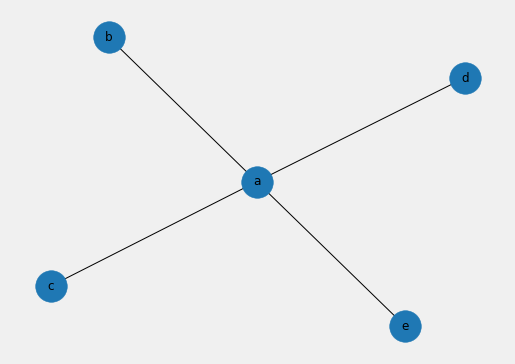

In [154]:
# create a undirected graph
G = nx.Graph()

# create a branch of edges
G.add_edges_from([("a","b"),("a","c"),("a","d"),("a","e")])

# draw the graph
fig, ax = plt.subplots(1, 1,figsize=(8,6))
nx.draw_networkx(G, ax=ax,node_size=1000)
plt.axis("off")
plt.show()

BRASIL

In [131]:
nx.triangles(G_brasil)

{'SBBZ': 69,
 'SBVH': 258,
 'SBCG': 1677,
 'SBAR': 1154,
 'SSCL': 0,
 'SNTI': 100,
 'SBUY': 33,
 'SBAT': 419,
 'SNMU': 137,
 'SNPD': 92,
 'SBAG': 38,
 'SNPP': 2,
 'SWYN': 14,
 'SWAE': 3,
 'SBMD': 123,
 'SBRG': 42,
 'SNYV': 0,
 'SNMZ': 41,
 'SSTD': 28,
 'SSVI': 54,
 'SBAV': 3,
 'SWWU': 0,
 'SWMP': 17,
 'SBJV': 811,
 'SWBU': 1,
 'SWPH': 3,
 'SNUU': 0,
 'SBFZ': 1889,
 'SNQX': 0,
 'SDOV': 1,
 'SDAG': 82,
 'SNDH': 1,
 'SBLE': 123,
 'SBAS': 152,
 'SBTT': 108,
 'SSOU': 8,
 'SNBG': 0,
 'SSRS': 2,
 'SBTV': 6,
 'SWOW': 1,
 'SBLN': 2,
 'SSCR': 1,
 'SWGP': 1,
 'SNSG': 0,
 'SBTF': 221,
 'SNIG': 2,
 'SWJW': 1,
 'SNYA': 42,
 'SNMH': 1,
 'SBMT': 89,
 'SBFL': 1617,
 'SNDC': 130,
 'SNUC': 6,
 'SBPV': 1192,
 'SBSP': 2774,
 'SSLS': 1,
 'SJRG': 6,
 'SNZA': 14,
 'SBAC': 9,
 'SJTS': 0,
 'SWUA': 3,
 'SNPC': 0,
 'SNBW': 1,
 'SNTS': 30,
 'SDJA': 0,
 'SNUH': 3,
 'SNSH': 103,
 'SBSN': 1094,
 'SNCX': 0,
 'SBAF': 8,
 'SBRJ': 2222,
 'SDDM': 1,
 'SBSR': 1789,
 'SWPQ': 6,
 'SSGG': 1,
 'SNQG': 1,
 'SWBV': 5,
 'SBMA': 6

In [134]:
nx.clustering(G_brasil)

{'SBBZ': 0.7582417582417582,
 'SBVH': 0.5548387096774193,
 'SBCG': 0.4482758620689655,
 'SBAR': 0.6306010928961748,
 'SSCL': 0,
 'SNTI': 0.6535947712418301,
 'SBUY': 0.7333333333333333,
 'SBAT': 0.5654520917678812,
 'SNMU': 0.7210526315789474,
 'SNPD': 0.4842105263157895,
 'SBAG': 0.8444444444444444,
 'SNPP': 0.6666666666666666,
 'SWYN': 0.9333333333333333,
 'SWAE': 1.0,
 'SBMD': 0.5324675324675324,
 'SBRG': 0.9333333333333333,
 'SNYV': 0,
 'SNMZ': 0.9111111111111111,
 'SSTD': 1.0,
 'SSVI': 0.9818181818181818,
 'SBAV': 1.0,
 'SWWU': 0,
 'SWMP': 0.8095238095238095,
 'SBJV': 0.689625850340136,
 'SWBU': 1.0,
 'SWPH': 1.0,
 'SNUU': 0,
 'SBFZ': 0.3974332000841574,
 'SNQX': 0,
 'SDOV': 1.0,
 'SDAG': 0.780952380952381,
 'SNDH': 1.0,
 'SBLE': 0.9044117647058824,
 'SBAS': 0.9934640522875817,
 'SBTT': 0.4268774703557312,
 'SSOU': 0.5333333333333333,
 'SNBG': 0,
 'SSRS': 0.6666666666666666,
 'SBTV': 1.0,
 'SWOW': 1.0,
 'SBLN': 0.6666666666666666,
 'SSCR': 1.0,
 'SWGP': 1.0,
 'SNSG': 0,
 'SBTF': 0

In [135]:
nx.average_clustering(G_brasil)

0.631013900417254

Norte

In [138]:
nx.triangles(G_norte)

{'SWKK': 3,
 'SBVH': 15,
 'SWNK': 34,
 'SNTI': 94,
 'SBUY': 16,
 'SJNP': 1,
 'SWMW': 42,
 'SWUI': 1,
 'SNOX': 90,
 'SNMA': 70,
 'SWYN': 14,
 'SWAE': 3,
 'SBMD': 88,
 'SWPF': 0,
 'SNYV': 0,
 'SBMY': 27,
 'SNMZ': 41,
 'SWBI': 5,
 'SNFX': 30,
 'SJLU': 1,
 'SBCZ': 51,
 'SWJP': 15,
 'SNNC': 0,
 'SWKO': 72,
 'SNCC': 1,
 'SJLM': 0,
 'SWWD': 1,
 'SNRB': 10,
 'SBTT': 74,
 'SNTP': 1,
 'SWUQ': 7,
 'SWII': 15,
 'SBJI': 21,
 'SNCI': 0,
 'SWOW': 1,
 'SDCG': 14,
 'SNVS': 48,
 'SNUO': 0,
 'SWGN': 98,
 'SBOI': 8,
 'SWPC': 0,
 'SBBV': 119,
 'SNLA': 3,
 'SBPJ': 96,
 'SWBR': 9,
 'SJQK': 22,
 'SBER': 0,
 'SBTF': 130,
 'SNSM': 0,
 'SNYA': 42,
 'SWJV': 1,
 'SBYA': 1,
 'SNDC': 57,
 'SBPV': 176,
 'SWEU': 11,
 'SWMK': 1,
 'SNNG': 8,
 'SBPM': 17,
 'SWNA': 8,
 'SWEE': 2,
 'SWHT': 41,
 'SSKW': 4,
 'SJTS': 0,
 'SNGQ': 1,
 'SWPJ': 0,
 'SBTB': 97,
 'SWTP': 9,
 'SBUA': 22,
 'SNSW': 6,
 'SWOB': 41,
 'SNBW': 1,
 'SNSH': 85,
 'SNPV': 0,
 'SBIH': 162,
 'SBMN': 86,
 'SWPI': 100,
 'SNDB': 3,
 'SBSN': 251,
 'SWSQ': 1,
 'SBAA

In [139]:
nx.clustering(G_norte)

{'SWKK': 1.0,
 'SBVH': 0.5357142857142857,
 'SWNK': 0.7555555555555555,
 'SNTI': 0.6911764705882353,
 'SBUY': 0.7619047619047619,
 'SJNP': 1.0,
 'SWMW': 0.6363636363636364,
 'SWUI': 1.0,
 'SNOX': 0.6617647058823529,
 'SNMA': 0.7692307692307693,
 'SWYN': 0.9333333333333333,
 'SWAE': 1.0,
 'SBMD': 0.5751633986928104,
 'SWPF': 0,
 'SNYV': 0,
 'SBMY': 0.4909090909090909,
 'SNMZ': 0.9111111111111111,
 'SWBI': 0.8333333333333334,
 'SNFX': 0.8333333333333334,
 'SJLU': 1.0,
 'SBCZ': 0.4857142857142857,
 'SWJP': 1.0,
 'SNNC': 0,
 'SWKO': 0.42105263157894735,
 'SNCC': 1.0,
 'SJLM': 0,
 'SWWD': 1.0,
 'SNRB': 0.6666666666666666,
 'SBTT': 0.48366013071895425,
 'SNTP': 1.0,
 'SWUQ': 0.7,
 'SWII': 1.0,
 'SBJI': 0.5833333333333334,
 'SNCI': 0,
 'SWOW': 1.0,
 'SDCG': 0.9333333333333333,
 'SNVS': 0.7272727272727273,
 'SNUO': 0,
 'SWGN': 0.6405228758169934,
 'SBOI': 0.8,
 'SWPC': 0,
 'SBBV': 0.3148148148148148,
 'SNLA': 1.0,
 'SBPJ': 0.5614035087719298,
 'SWBR': 0.6,
 'SJQK': 0.4,
 'SBER': 0,
 'SBTF': 0.

In [140]:
nx.average_clustering(G_norte)

0.6134444520831853

Nordeste

In [141]:
nx.triangles(G_nordeste)

{'SBAR': 161,
 'SBJU': 158,
 'SNMU': 7,
 'SBFE': 10,
 'SNPP': 0,
 'SNQD': 32,
 'SBIZ': 75,
 'SBUF': 45,
 'SNIC': 1,
 'SNJD': 3,
 'SNDM': 6,
 'SNCL': 1,
 'SDZG': 0,
 'SNBI': 0,
 'SNQY': 59,
 'SWRF': 0,
 'SNJO': 1,
 'SBTC': 50,
 'SNJK': 0,
 'SNUU': 0,
 'SBFZ': 197,
 'SNQX': 0,
 'SBIL': 104,
 'SNDH': 1,
 'SBLP': 5,
 'SBLE': 18,
 'SNBS': 0,
 'SNIP': 1,
 'SNHS': 1,
 'SSRS': 2,
 'SBTV': 0,
 'SNRS': 0,
 'SDLK': 0,
 'SJUR': 0,
 'SNOB': 0,
 'SWNB': 1,
 'SNSG': 0,
 'SNIG': 2,
 'SBTE': 97,
 'SNUC': 6,
 'SNIU': 0,
 'SNAB': 0,
 'SBPS': 151,
 'SSLS': 0,
 'SNRU': 36,
 'SWBE': 0,
 'SBAC': 6,
 '2NHT': 3,
 'SNBR': 51,
 'SNWS': 0,
 'SBSV': 230,
 'SNPC': 0,
 'SNVB': 15,
 'SNTS': 30,
 'SNBX': 0,
 'SBCV': 4,
 'SNVR': 0,
 'SNBU': 0,
 'SNTF': 5,
 'SNQM': 0,
 'SBMO': 178,
 'SBJP': 181,
 'SNML': 0,
 'SNVC': 0,
 'SNAT': 8,
 'SNQG': 1,
 'SBPB': 63,
 'SNKK': 20,
 'SIBU': 3,
 'SNKB': 1,
 'SBMS': 37,
 'SNAH': 0,
 'SNRJ': 0,
 'SBQV': 59,
 'SBVC': 28,
 'SNDQ': 0,
 'SBFN': 51,
 'SNJB': 1,
 'SBRF': 229,
 'SBPL': 158,
 '

In [142]:
nx.clustering(G_nordeste)

{'SBAR': 0.5366666666666666,
 'SBJU': 0.45014245014245013,
 'SNMU': 0.7,
 'SBFE': 1.0,
 'SNPP': 0,
 'SNQD': 0.5818181818181818,
 'SBIZ': 0.7142857142857143,
 'SBUF': 1.0,
 'SNIC': 1.0,
 'SNJD': 0.5,
 'SNDM': 1.0,
 'SNCL': 1.0,
 'SDZG': 0,
 'SNBI': 0,
 'SNQY': 0.5619047619047619,
 'SWRF': 0,
 'SNJO': 1.0,
 'SBTC': 0.7575757575757576,
 'SNJK': 0,
 'SNUU': 0,
 'SBFZ': 0.3310924369747899,
 'SNQX': 0,
 'SBIL': 0.5473684210526316,
 'SNDH': 1.0,
 'SBLP': 0.5,
 'SBLE': 0.8571428571428571,
 'SNBS': 0,
 'SNIP': 1.0,
 'SNHS': 1.0,
 'SSRS': 0.6666666666666666,
 'SBTV': 0,
 'SNRS': 0,
 'SDLK': 0,
 'SJUR': 0,
 'SNOB': 0,
 'SWNB': 1.0,
 'SNSG': 0,
 'SNIG': 0.6666666666666666,
 'SBTE': 0.5672514619883041,
 'SNUC': 1.0,
 'SNIU': 0,
 'SNAB': 0,
 'SBPS': 0.4646153846153846,
 'SSLS': 0,
 'SNRU': 1.0,
 'SWBE': 0,
 'SBAC': 1.0,
 '2NHT': 1.0,
 'SNBR': 0.375,
 'SNWS': 0,
 'SBSV': 0.1607267645003494,
 'SNPC': 0,
 'SNVB': 0.7142857142857143,
 'SNTS': 0.6666666666666666,
 'SNBX': 0,
 'SBCV': 0.6666666666666666,


In [143]:
nx.average_clustering(G_nordeste)

0.46691258211663433

Sul

In [144]:
nx.triangles(G_sul)

{'SBPG': 0,
 'SBPK': 106,
 'SSCP': 5,
 'SSPK': 1,
 'SBCD': 73,
 'SSEP': 3,
 'SSER': 98,
 'SBTD': 24,
 'SBMG': 63,
 'SBCX': 121,
 'SBUG': 78,
 'SSBG': 0,
 'SSIJ': 3,
 'SSUM': 10,
 'SSAB': 0,
 'SSUV': 1,
 'SBBI': 11,
 'SSCR': 0,
 'SSBN': 0,
 'SBJA': 10,
 'SBPF': 134,
 'SBTL': 0,
 'SBCH': 211,
 'SBNM': 84,
 'SSPI': 0,
 'SSKM': 1,
 'SBBG': 13,
 'SSJA': 75,
 'SBPO': 9,
 'SBRG': 18,
 'SBFI': 103,
 'SNEE': 1,
 'SSOG': 8,
 'SSZR': 44,
 'SSGG': 0,
 'SBPA': 221,
 'SBFL': 183,
 'SBNF': 83,
 'SSLT': 7,
 'SSCC': 8,
 'SSCK': 46,
 'SBTR': 0,
 'SSCN': 1,
 'SSSC': 0,
 'SBGS': 1,
 'SSNH': 1,
 'SSTD': 15,
 'SSVI': 20,
 'SJRG': 6,
 'SBGU': 1,
 'SSSB': 1,
 'SSOE': 14,
 'SBLJ': 62,
 'SBSM': 127,
 'SNCP': 6,
 'SBCA': 82,
 'SBMH': 28,
 'SBLO': 112,
 'SBJV': 83,
 'SSPG': 1,
 'SSAP': 5,
 'SBCT': 234,
 'SBCM': 51,
 'SSFB': 22,
 'SSUW': 33,
 'SSVL': 4,
 'SSCT': 2,
 'SSAE': 0,
 'SSGY': 0,
 'SSPB': 28,
 'SSTE': 0,
 'SSHZ': 3,
 'SIXE': 0,
 'SBCO': 0}

In [145]:
nx.clustering(G_sul)

{'SBPG': 0,
 'SBPK': 0.6198830409356725,
 'SSCP': 0.8333333333333334,
 'SSPK': 1.0,
 'SBCD': 0.5367647058823529,
 'SSEP': 1.0,
 'SSER': 0.6405228758169934,
 'SBTD': 0.8571428571428571,
 'SBMG': 0.8076923076923077,
 'SBCX': 0.6368421052631579,
 'SBUG': 0.65,
 'SSBG': 0,
 'SSIJ': 1.0,
 'SSUM': 0.6666666666666666,
 'SSAB': 0,
 'SSUV': 1.0,
 'SBBI': 0.7333333333333333,
 'SSCR': 0,
 'SSBN': 0,
 'SBJA': 1.0,
 'SBPF': 0.638095238095238,
 'SBTL': 0,
 'SBCH': 0.3546218487394958,
 'SBNM': 0.6176470588235294,
 'SSPI': 0,
 'SSKM': 1.0,
 'SBBG': 0.6190476190476191,
 'SSJA': 0.7142857142857143,
 'SBPO': 0.6,
 'SBRG': 0.8571428571428571,
 'SBFI': 0.49047619047619045,
 'SNEE': 1.0,
 'SSOG': 0.5333333333333333,
 'SSZR': 0.6666666666666666,
 'SSGG': 0,
 'SBPA': 0.20444033302497688,
 'SBFL': 0.4206896551724138,
 'SBNF': 0.6916666666666667,
 'SSLT': 0.7,
 'SSCC': 0.8,
 'SSCK': 0.8363636363636363,
 'SBTR': 0,
 'SSCN': 1.0,
 'SSSC': 0,
 'SBGS': 1.0,
 'SSNH': 1.0,
 'SSTD': 1.0,
 'SSVI': 0.9523809523809523,
 

In [146]:
nx.average_clustering(G_sul)

0.6009815673908334

Sudeste

In [147]:
nx.triangles(G_sudeste)

{'SBCP': 184,
 'SBBZ': 69,
 'SNJR': 36,
 'SBSJ': 371,
 'SDSC': 168,
 'SBJH': 0,
 'SIFV': 10,
 'SBBU': 149,
 'SBYS': 1,
 'SNPD': 60,
 'SBCF': 430,
 'SBGV': 163,
 'SWLF': 0,
 'SBAG': 38,
 'SIMK': 42,
 'SDUN': 11,
 'SBMI': 1,
 'SDAM': 107,
 'SNDV': 10,
 'SBGR': 552,
 'SBMK': 165,
 'SDBB': 0,
 'SBAV': 3,
 'SDBK': 21,
 'SNFO': 0,
 'SDMC': 6,
 'SDRS': 17,
 'SNOS': 4,
 'SDAG': 82,
 'SNBM': 0,
 'SBAS': 45,
 'SNJN': 6,
 'SNMK': 12,
 'SNAR': 6,
 'SNBG': 0,
 'SIGP': 3,
 'SNMX': 10,
 'SBLN': 2,
 'SBJF': 200,
 'SNGX': 3,
 'SDOU': 6,
 'SNAP': 0,
 'SBML': 237,
 'SDAN': 3,
 'SDTK': 41,
 'SBMT': 79,
 'SBLS': 6,
 'SBSP': 561,
 'SDZC': 0,
 'SBGP': 10,
 'SBST': 23,
 'SNZA': 12,
 'SDIM': 0,
 'SBBQ': 13,
 'SNZR': 9,
 'SBDN': 216,
 'SBRP': 413,
 'SDPA': 10,
 'SBJD': 203,
 'SBGL': 470,
 'SJTC': 106,
 'SBBP': 0,
 'SNJM': 5,
 'SNUI': 11,
 'SDJA': 0,
 'SNGA': 0,
 'SNUH': 3,
 'SBAU': 210,
 'SNPY': 5,
 'SBCB': 122,
 'SNTO': 18,
 'SNPX': 6,
 'SNCX': 0,
 'SBME': 218,
 'SBAF': 8,
 'SBRJ': 512,
 'SDDM': 0,
 'SNPJ': 8,

In [148]:
nx.clustering(G_sudeste)

{'SBCP': 0.5661538461538461,
 'SBBZ': 0.7582417582417582,
 'SNJR': 1.0,
 'SBSJ': 0.5570570570570571,
 'SDSC': 0.8,
 'SBJH': 0,
 'SIFV': 1.0,
 'SBBU': 0.7842105263157895,
 'SBYS': 1.0,
 'SNPD': 0.5,
 'SBCF': 0.41545893719806765,
 'SBGV': 0.7056277056277056,
 'SWLF': 0,
 'SBAG': 0.8444444444444444,
 'SIMK': 0.9333333333333333,
 'SDUN': 0.7333333333333333,
 'SBMI': 1.0,
 'SDAM': 0.8916666666666667,
 'SNDV': 1.0,
 'SBGR': 0.3016393442622951,
 'SBMK': 0.7142857142857143,
 'SDBB': 0,
 'SBAV': 1.0,
 'SDBK': 1.0,
 'SNFO': 0,
 'SDMC': 1.0,
 'SDRS': 0.8095238095238095,
 'SNOS': 0.6666666666666666,
 'SDAG': 0.780952380952381,
 'SNBM': 0,
 'SBAS': 1.0,
 'SNJN': 1.0,
 'SNMK': 0.8,
 'SNAR': 1.0,
 'SNBG': 0,
 'SIGP': 1.0,
 'SNMX': 1.0,
 'SBLN': 0.6666666666666666,
 'SBJF': 0.7246376811594203,
 'SNGX': 1.0,
 'SDOU': 0.6,
 'SNAP': 0,
 'SBML': 0.79,
 'SDAN': 1.0,
 'SDTK': 0.7454545454545455,
 'SBMT': 0.6583333333333333,
 'SBLS': 1.0,
 'SBSP': 0.2462686567164179,
 'SDZC': 0,
 'SBGP': 1.0,
 'SBST': 0.6388

In [149]:
nx.average_clustering(G_sudeste)

0.6175309816849809

Centro-Oeste

In [150]:
nx.triangles(G_centrooeste)

{'SBCG': 42,
 'SSCL': 0,
 'SSND': 3,
 'SBAT': 24,
 'SNXL': 1,
 'SIQE': 0,
 'SBBW': 22,
 'SWBZ': 5,
 'SBRD': 10,
 'SWWA': 2,
 'SBIT': 1,
 'SILC': 11,
 'SWTS': 12,
 'SWYY': 0,
 'SWHG': 2,
 'SWWU': 0,
 'SWMP': 4,
 'SBDB': 3,
 'SBSO': 18,
 'SWBU': 0,
 'SWDM': 2,
 'SWPH': 3,
 'SWKC': 0,
 'SDOV': 1,
 'SSOU': 4,
 'SWJU': 12,
 'SSBE': 0,
 'SWVR': 1,
 'SBAN': 1,
 'SSBB': 0,
 'SWGP': 1,
 'SJHG': 18,
 'SWDE': 0,
 'SWJW': 0,
 'SWFE': 1,
 'SNMH': 0,
 'SWNQ': 5,
 'SWIQ': 8,
 'SJKB': 9,
 'SWNH': 1,
 'SWEK': 9,
 'SWUA': 3,
 'SWJN': 30,
 'SJDB': 1,
 'SJVO': 0,
 'SWYK': 3,
 'SDNM': 5,
 'SWLV': 0,
 'SWJH': 13,
 'SBDO': 1,
 'SWCB': 0,
 'SSTL': 0,
 'SWPY': 3,
 'SWXV': 7,
 'SWPQ': 3,
 'SWXM': 1,
 'SWCD': 0,
 'SBCR': 11,
 'SBPP': 1,
 'SWCP': 3,
 'SBTG': 1,
 'SWBG': 3,
 'SWDB': 0,
 '6ASO': 5,
 'SWFX': 41,
 'SWTU': 14,
 'SBBR': 62,
 'SWRP': 19,
 'SBMC': 8,
 'SSDO': 6,
 'SWNS': 1,
 'SIKC': 3,
 'SWKN': 1,
 'SWSI': 39,
 'SSAC': 0,
 'SDH2': 7,
 'SBGO': 74,
 'SSNC': 0,
 'SBSI': 16,
 'SWZM': 0,
 'SBCY': 126,
 'SWCI'

In [137]:
nx.clustering(G_centrooeste)

{'SBCG': 0.24561403508771928,
 'SSCL': 0,
 'SSND': 1.0,
 'SBAT': 0.43636363636363634,
 'SNXL': 1.0,
 'SIQE': 0,
 'SBBW': 0.6111111111111112,
 'SWBZ': 0.8333333333333334,
 'SBRD': 1.0,
 'SWWA': 0.6666666666666666,
 'SBIT': 1.0,
 'SILC': 0.5238095238095238,
 'SWTS': 0.42857142857142855,
 'SWYY': 0,
 'SWHG': 0.6666666666666666,
 'SWWU': 0,
 'SWMP': 0.6666666666666666,
 'SBDB': 1.0,
 'SBSO': 0.8571428571428571,
 'SWBU': 0,
 'SWDM': 0.3333333333333333,
 'SWPH': 1.0,
 'SWKC': 0,
 'SDOV': 1.0,
 'SSOU': 0.6666666666666666,
 'SWJU': 0.8,
 'SSBE': 0,
 'SWVR': 1.0,
 'SBAN': 1.0,
 'SSBB': 0,
 'SWGP': 1.0,
 'SJHG': 0.6428571428571429,
 'SWDE': 0,
 'SWJW': 0,
 'SWFE': 1.0,
 'SNMH': 0,
 'SWNQ': 0.8333333333333334,
 'SWIQ': 0.5333333333333333,
 'SJKB': 0.9,
 'SWNH': 1.0,
 'SWEK': 0.42857142857142855,
 'SWUA': 1.0,
 'SWJN': 0.38461538461538464,
 'SJDB': 1.0,
 'SJVO': 0,
 'SWYK': 1.0,
 'SDNM': 0.8333333333333334,
 'SWLV': 0,
 'SWJH': 0.4642857142857143,
 'SBDO': 1.0,
 'SWCB': 0,
 'SSTL': 0,
 'SWPY': 1.0

In [151]:
nx.average_clustering(G_centrooeste)

0.5652821004267258

Em resumo temos os seguintes valores para a média de clustering das regiões analisadas:

In [155]:
print("Brasil: ", nx.average_clustering(G_brasil))
print("Norte: ", nx.average_clustering(G_norte))
print("Nordeste: ", nx.average_clustering(G_nordeste))
print("Sul: ", nx.average_clustering(G_sul))
print("Sudeste: ", nx.average_clustering(G_sudeste))
print("Centro-Oeste: ", nx.average_clustering(G_centrooeste))

Brasil:  0.631013900417254
Norte:  0.6134444520831853
Nordeste:  0.46691258211663433
Sul:  0.6009815673908334
Sudeste:  0.6175309816849809
Centro-Oeste:  0.5652821004267258
